In [1]:
from modeling.statmodeling.AR import AR
from util.tools import dotdict
from util.metrics import get_metrics
from util.data_visualization import plot_time_series, plot_acf, plot_pacf, plot_seasonal_difference

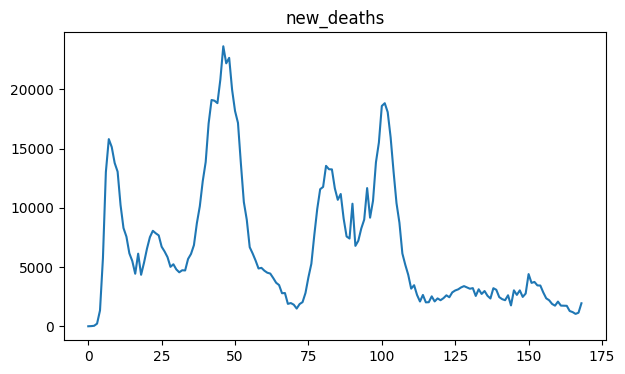

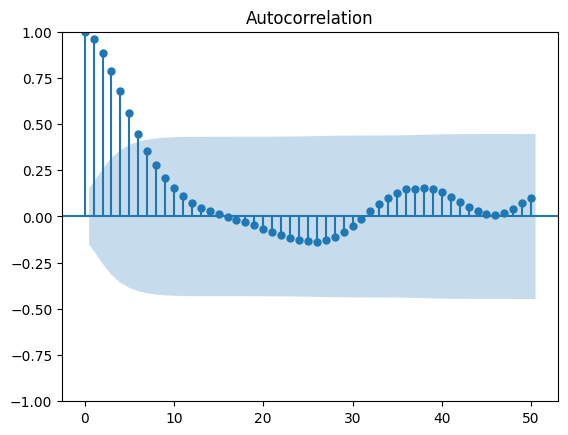

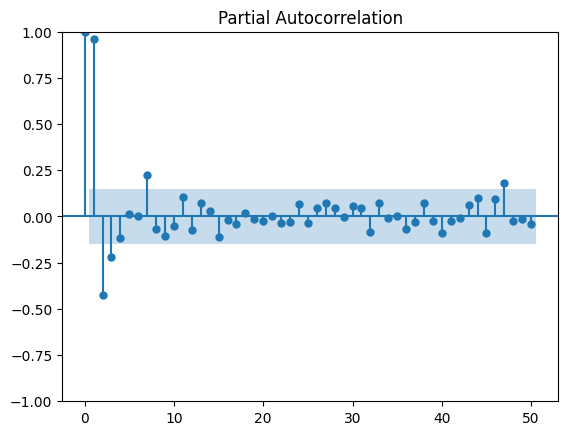

In [2]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.MO = 'new_deaths'
args.diff_order = None
args.lags = 50 

plot_time_series(file_name = args.file_name, main_output = args.MO)

plot_acf(file_name = args.file_name, main_output = args.MO, lags = args.lags, diff_order = args.diff_order)

plot_pacf(file_name = args.file_name, main_output = args.MO, lags = args.lags, diff_order = args.diff_order)

100%|██████████| 82/82 [00:00<00:00, 119.29it/s]


Total Time:0.7159779071807861 seconds.


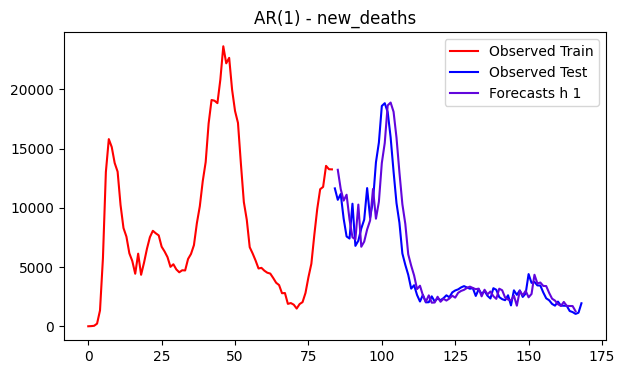

Out of Sample Test set metrics new_deaths
h:0, N:82, MSE:1424006.5917481335, MAE:802.3158557864444, sMAPE:15.030336801858983, RMSE:1193.3174731596507
h:1, N:82, MSE:3392992.107033105, MAE:1147.9472840174772, sMAPE:19.228987568610304, RMSE:1842.0076294720132
h:2, N:82, MSE:6017458.8808426, MAE:1488.7311201332975, sMAPE:24.449164662153244, RMSE:2453.050933193724
h:3, N:82, MSE:9364535.625188727, MAE:1808.129602084261, sMAPE:29.906308083097844, RMSE:3060.1528761139903
Average MSE: 5049748.301203141, Average MAE: 1311.78096550537, Average sMAPE: 22.153699278930095, Average RMSE: 2137.1322279848446


In [3]:
args = dotdict()
args.file_name = 'https://raw.githubusercontent.com/scalation/data/master/COVID/covid_weekly.csv'
args.training_ratio = 0.5
args.horizon = 4
args.MO = 'new_deaths'
args.normalization = False
args.p = 1
args.model = 'AR('+str(args.p)+')'
args.vis_h = 1
args.last_only = False
args.inverse_transform = False
args.trend = 'n'
actual, forecasts, model_ar = AR(file_name = args.file_name, training_ratio = args.training_ratio,
                                horizon = args.horizon, main_output = args.MO,
                                normalization = args.normalization, model = args.model, 
                                p = args.p, vis_h = args.vis_h, last_only = args.LTSF, 
                                inverse_transform = args.inverse_transform, trend = args.trend)
get_metrics(actual = actual, forecasts = forecasts, args = args)

In [4]:
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  165
Model:                     AutoReg(1)   Log Likelihood               -1424.216
Method:               Conditional MLE   S.D. of innovations           1429.821
Date:                Sat, 02 Mar 2024   AIC                           2852.432
Time:                        20:23:29   BIC                           2858.631
Sample:                             1   HQIC                          2854.949
                                  165                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
new_deaths.L1     0.9866      0.013     77.286      0.000       0.962       1.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0136           +0.0000j            1.0136            0.0000
-----------------------------------------------------------------------------
"""